In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [3]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Graph

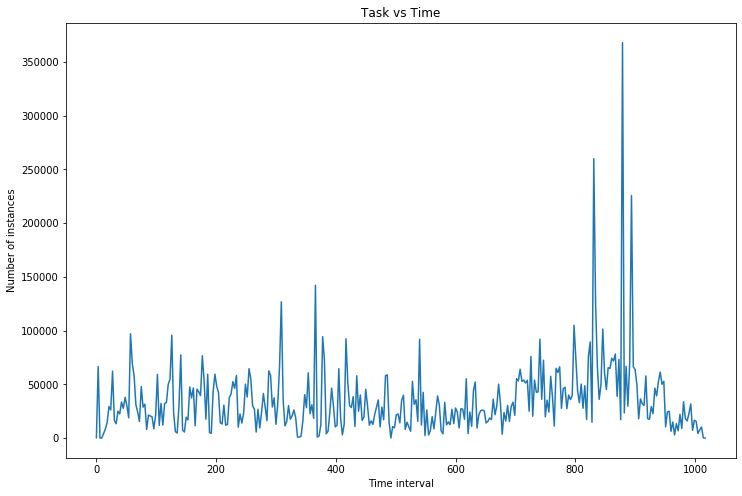

In [4]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Without Sliding Window_ARMA

C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Size= 272
Train 
 272
Test 
 68
Time, predicted, expected 
 816 31139 48646.0
Time, predicted, expected 
 819 34586 17227.0
Time, predicted, expected 
 822 29323 75695.0
Time, predicted, expected 
 825 38896 89404.0
Time, predicted, expected 
 828 43047 14633.0
Time, predicted, expected 
 831 29406 259887.0
Time, predicted, expected 
 834 59170 125832.0
Time, predicted, expected 
 837 69910 66533.0


C:\Users\Uvcan\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Time, predicted, expected 
 840 67490 35993.0
Time, predicted, expected 
 843 62550 49375.0
Time, predicted, expected 
 846 60761 101400.0
Time, predicted, expected 
 849 65498 60457.0
Time, predicted, expected 
 852 64570 45092.0
Time, predicted, expected 
 855 61910 65475.0
Time, predicted, expected 
 858 62173 64705.0
Time, predicted, expected 
 861 61297 74241.0
Time, predicted, expected 
 864 63119 71728.0
Time, predicted, expected 
 867 63708 78135.0
Time, predicted, expected 
 870 64852 38759.0
Time, predicted, expected 
 873 62260 73167.0
Time, predicted, expected 
 876 62940 17094.0
Time, predicted, expected 
 879 58230 367838.0
Time, predicted, expected 
 882 83387 23384.0
Time, predicted, expected 
 885 76210 66751.0
Time, predicted, expected 
 888 76744 29636.0
Time, predicted, expected 
 891 70805 70221.0
Time, predicted, expected 
 894 70528 225655.0
Time, predicted, expected 
 897 83259 66359.0
Time, predicted, expected 
 900 81393 63774.0
Time, predicted, expected 
 903

C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


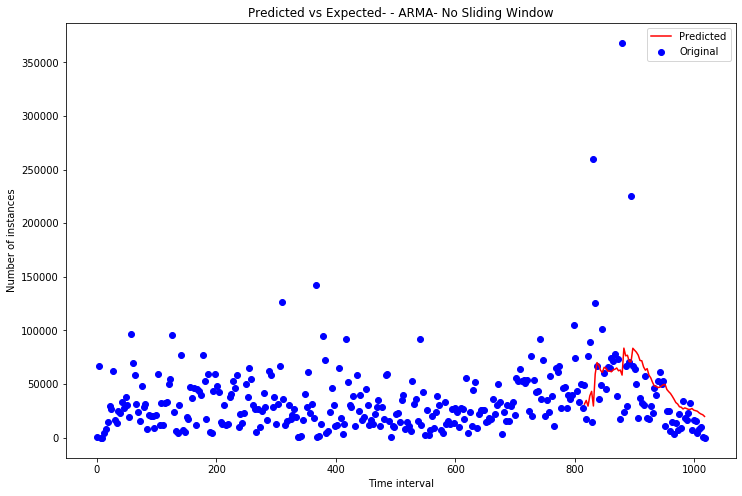

In [6]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARMA

#Computational Time
import time
time_start = time.clock()

X = df2.no_of_instances
X = X.astype('float32')
size = int(len(X) * 0.80)
print('Size=',size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print('History \n', history)
print('Train \n', len(train))
print('Test \n', len(test))
#print('Train \n', train)
#print('Test \n', test)
predictions = list()
#for t in range(len(test)):
times=[]
SE=0
sumAPE=0
#sumMASE=0
for t in range (len(train),len(train)+len(test)):
    model = ARMA(history, order=(1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    yhat = int(output[0])
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('XYZ')
    times.append(df2.time_interval[t])
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, obs)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test[t]-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/len(test))
MAPE=(sumAPE/(len(test)))*100
#MASE=(sumMASE/(len(test)))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- - ARMA- No Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted')
plt.scatter(df2.time_interval, df2.no_of_instances, color='blue', label='Original')
plt.legend()
plt.show()
